In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'E:\DS FILES\titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [8]:
for i in ['Cabin','Embarked']:
           data[i]=data[i].fillna(data[i].mode()[0]) 

In [9]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
data1=data.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'],axis=1)

In [12]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,28.0,1,2
889,1,1,male,26.0,0,0


In [13]:
data1=pd.get_dummies(data1)  # one hot encoding , encode gender 
data1

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1
887,1,1,19.0,0,0,1,0
888,0,3,28.0,1,2,1,0
889,1,1,26.0,0,0,0,1


In [14]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

D:\user\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


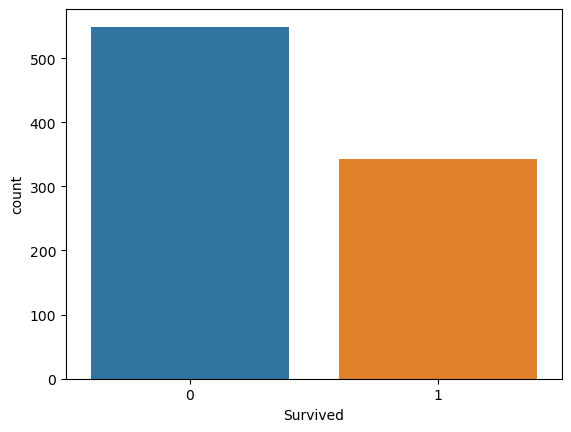

In [15]:
sns.countplot(data['Survived'], label = 'count')
plt.show()

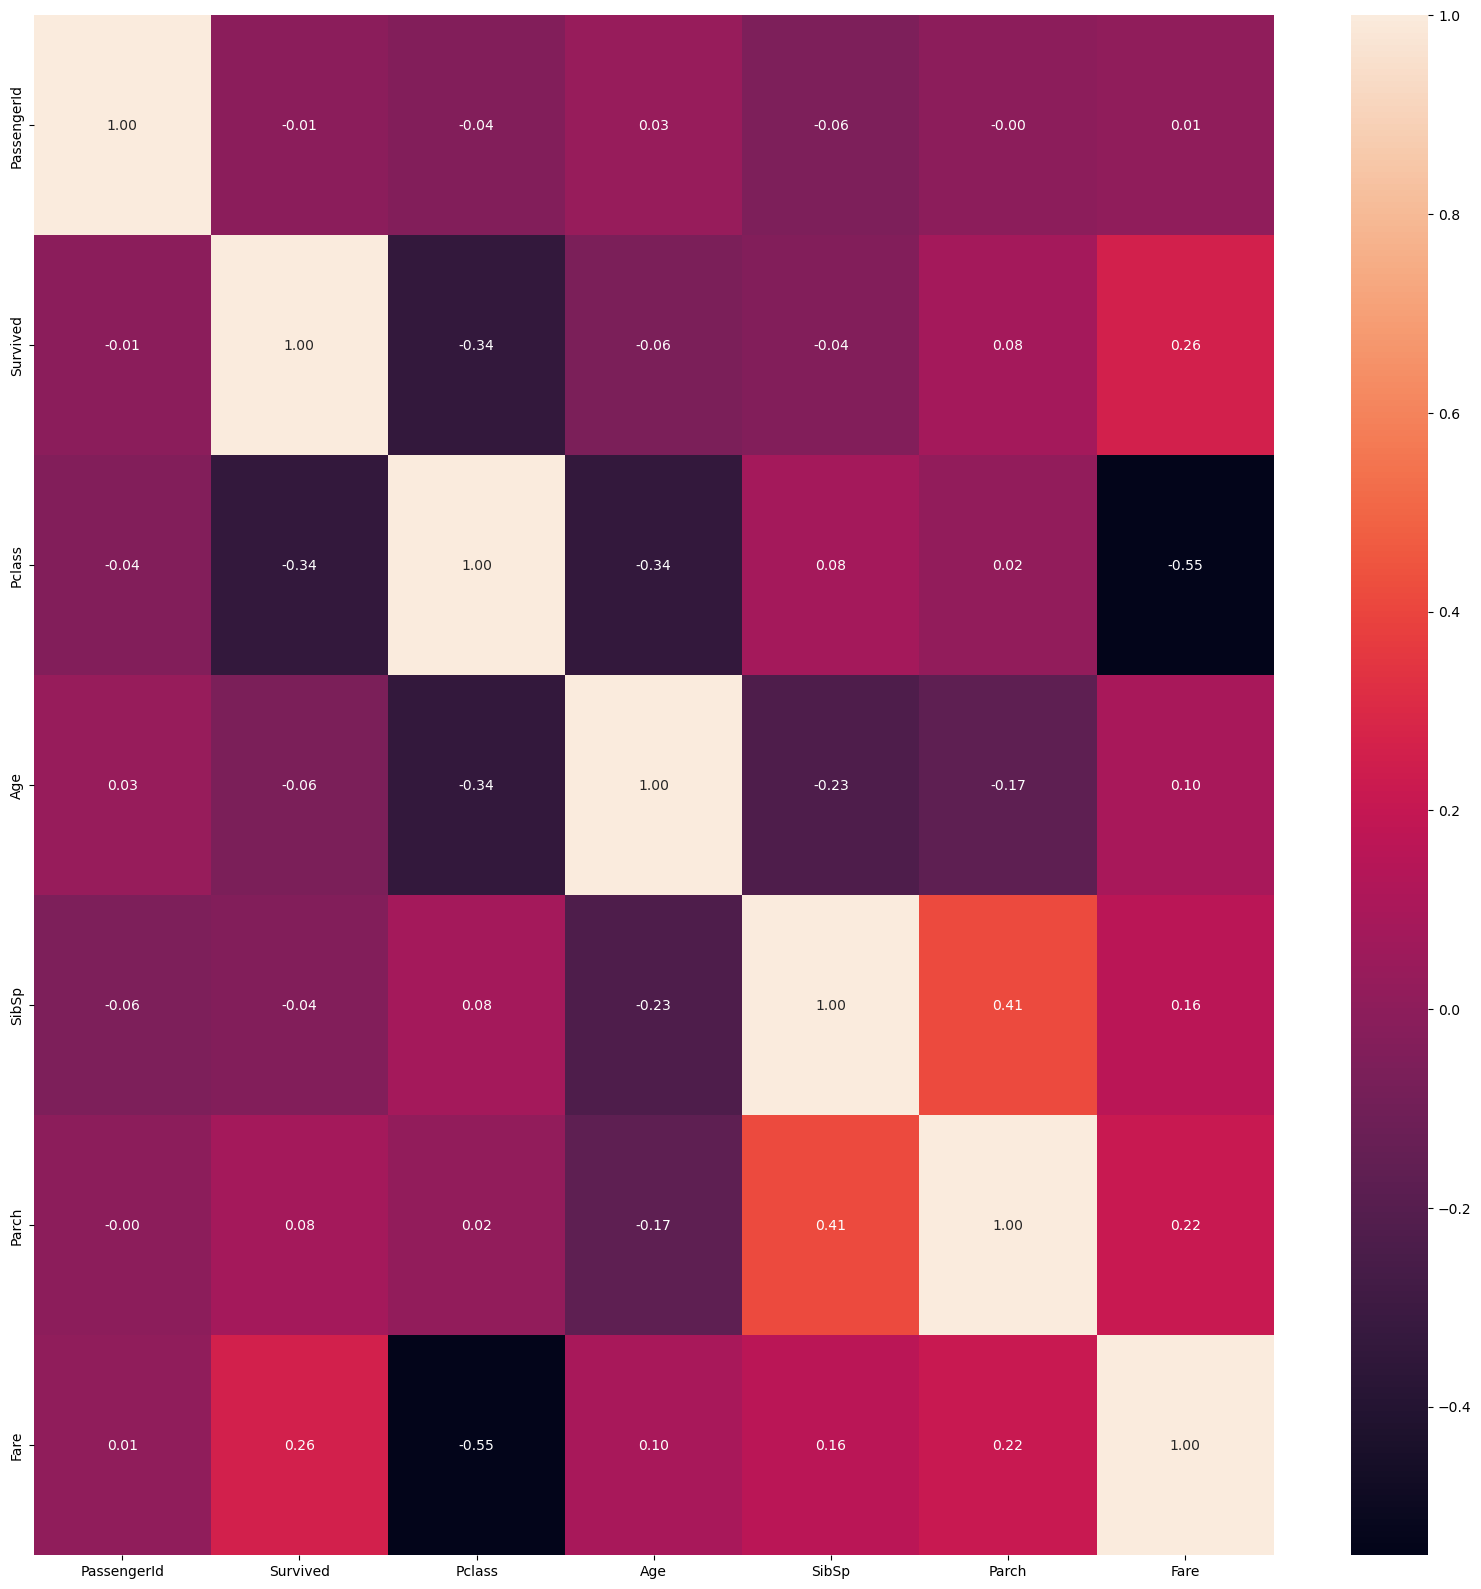

In [16]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot = True, fmt= '.2f')
plt.show()

In [17]:
y=data1['Survived']
X=data1.drop('Survived',axis=1)

# Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)  # split it to train and test set


In [19]:
ac_list = []
model_names = []

# StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() # create an instance 
model=lr.fit(X_train,y_train)# create the model
y_pred=model.predict(X_test)  # preditction

In [22]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score

In [24]:
confusion_matrix(y_test,y_pred)

array([[122,  12],
       [ 28,  61]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.820627802690583

In [26]:
precision_score(y_test,y_pred)

0.8356164383561644

In [27]:
recall_score(y_test,y_pred)

0.6853932584269663

In [28]:
MR_ac=accuracy_score(y_test,y_pred)
ac_list.append(MR_ac)
model_names.append('LR')

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]    #empty list
neighbors=np.arange(3,15)# taking valuse for 3 to 14 to the variable 

for k in neighbors:   # creating  a loop k (3 to 14)
    # create knn model  where k is 3 first till it is 14 
    knn=KNeighborsClassifier(n_neighbors=k)    # create an instance 
    model1=knn.fit(X_train,y_train)    # create the model
    y_pred_knn=model1.predict(X_test)   # preditction
    acc=accuracy_score(y_test,y_pred_knn)  # accurary
    metric_k.append(acc)   # append accuray to list 
 # check which valuse of k will give highest accuarcy

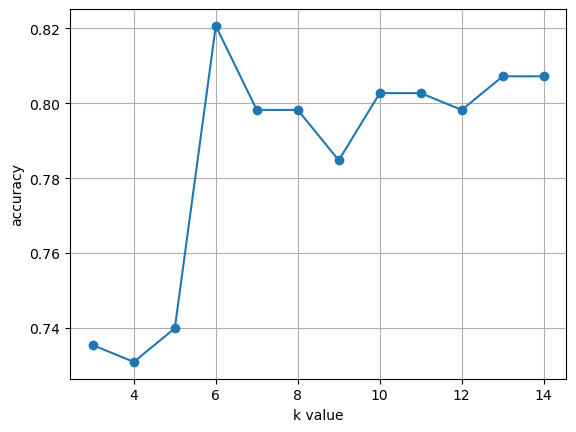

In [30]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid() # k value is more for 7 so

In [31]:
knn=KNeighborsClassifier(n_neighbors=7)
model1=knn.fit(X_train,y_train)
y_pred_knn=model1.predict(X_test)
   

In [32]:
confusion_matrix(y_test,y_pred_knn)

array([[113,  21],
       [ 24,  65]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred_knn)

0.7982062780269058

In [34]:
precision_score(y_test,y_pred_knn)

0.7558139534883721

In [35]:
recall_score(y_test,y_pred_knn)

0.7303370786516854

In [36]:
KNN_ac = accuracy_score(y_test, y_pred_knn)
ac_list.append(KNN_ac)
model_names.append('KNN')

# SVM MODEL

In [37]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(X_train,y_train)
y_pred1=svm_clf.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred1)  


array([[119,  15],
       [ 26,  63]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred1)

0.8161434977578476

In [40]:
precision_score(y_test,y_pred1)

0.8076923076923077

In [41]:
recall_score(y_test,y_pred1)

0.7078651685393258

In [42]:
SVC_rbf_ac = accuracy_score(y_test, y_pred1)
ac_list.append(SVC_rbf_ac)
model_names.append('SVC_rbf_ac')

In [43]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(X_train,y_train)
y_pred2=svm_clf.predict(X_test)

In [44]:
confusion_matrix(y_test,y_pred2)  

array([[112,  22],
       [ 26,  63]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred2) 

0.7847533632286996

In [46]:
precision_score(y_test,y_pred2)

0.7411764705882353

In [47]:
recall_score(y_test,y_pred2)

0.7078651685393258

In [48]:
SVC_linear_ac = accuracy_score(y_test, y_pred2)
ac_list.append(SVC_linear_ac)
model_names.append('SVC_linear_ac')

In [49]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='poly', degree=8)
svm_model=svm_clf.fit(X_train,y_train)
y_pred3=svm_clf.predict(X_test)

In [50]:
confusion_matrix(y_test,y_pred3)  

array([[126,   8],
       [ 39,  50]], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred3) 

0.7892376681614349

In [52]:
precision_score(y_test,y_pred3)

0.8620689655172413

In [53]:
recall_score(y_test,y_pred3)

0.5617977528089888

In [54]:
SVC_poly_ac = accuracy_score(y_test, y_pred3)
ac_list.append(SVC_poly_ac)
model_names.append('SVC_poly_ac')

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
DT_pred=dt_clf.predict(X_test)

In [61]:
confusion_matrix(y_test, DT_pred)

array([[90, 44],
       [26, 63]], dtype=int64)

In [62]:
accuracy_score(y_test, DT_pred)

0.6860986547085202

In [63]:
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

# Random forest algorithm

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
RFA_pred=rf_clf.predict(X_test)

In [65]:
confusion_matrix(y_test,RFA_pred)  

array([[94, 40],
       [18, 71]], dtype=int64)

In [66]:
accuracy_score(y_test,RFA_pred)

0.7399103139013453

In [67]:
RFA_ac = accuracy_score(y_test, RFA_pred)
ac_list.append(RFA_ac)
model_names.append('RFA')

In [76]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': 'Accuracy(in %)'}, inplace=True)
round(model_ac*100, 3)


,Accuracy(in %)
LR,82.063
KNN,79.821
SVC_rbf_ac,81.614
SVC_linear_ac,78.475
SVC_poly_ac,78.924
DT,68.610
RFA,73.991
